<a href="https://colab.research.google.com/github/M2kishore/Cisco-ML-and-Image-Processing-Course/blob/main/thingqbator_ml_imageprocessing_playing_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Playing with images

Displaying an image using imshow()

In [2]:
import numpy as np
import cv2
image = cv2.imread('cat.jpg',1)
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


displayig and saving an image using imread()

In [3]:
import numpy as np
import cv2
image = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
cv2.imshow('image',image)
i = cv2.waitKey(0)
if i == 27:
    cv2.destroyAllWindows()
elif i == ord('s'): #press 's' to save the image 
    cv2.imwrite('cat_copy.jpg',image)
cv2.destroyAllWindows()


display using matplotlib

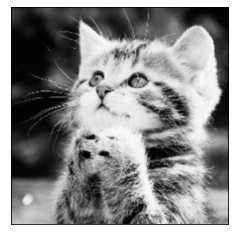

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('cat.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis 
plt.show()

greyscale to binary using cv2.threshold()

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('cat.jpg',cv2.IMREAD_COLOR)
grey = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
th1, threshold = cv2.threshold(grey,127,255,cv2.THRESH_BINARY) #threshold
threshold

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

adaptive threshold

In [6]:
th2 = cv2.adaptiveThreshold(grey,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th2

array([[  0,   0,   0, ..., 255, 255, 255],
       [255, 255,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

resizing image

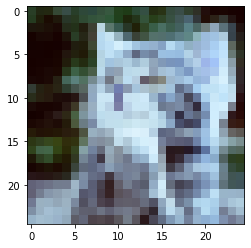

In [7]:
import cv2
import numpy as np
img = cv2.imread('cat.jpg')
res = cv2.resize(img,None,fx=0.1, fy=0.1, interpolation = cv2.INTER_AREA)
res2 = cv2.resize(img,None,fx=10, fy=10, interpolation = cv2.INTER_AREA)
plt.imshow(res)
#plt.imshow(res2)

gaussian blur

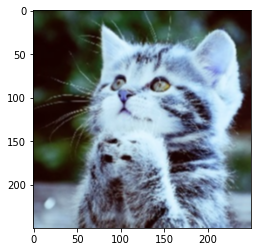

In [16]:
#blurImage = cv2.GaussianBlur(image,(kernel_width,kernel_height),standard_deviation)
blurImage = cv2.GaussianBlur(image,(3,3),0)
plt.imshow(blurImage)

Converting BGR to HSV

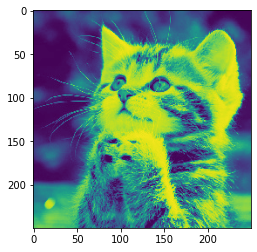

In [17]:
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(hsv)

stacking images

In [19]:
import numpy as np
import cv2
img1 = cv2.imread('cat.jpg')
h,w,bpp = np.shape(img1)
img_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.merge((img_gray,img_gray,img_gray))
th1, img3 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
img4 = cv2.resize(img1,None,fx=0.1, fy=0.1, interpolation = cv2.INTER_AREA)
img4 = cv2.resize(img4,None,fx=10, fy=10, interpolation = cv2.INTER_AREA)
img5 = cv2.GaussianBlur(img1,(9,9),10)
img6 = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
temp1 = np.concatenate((img1,img2,img3), axis=1)
temp2 = np.concatenate((img4,img5,img6), axis=1)
img_final = np.concatenate((temp1,temp2), axis=0)
cv2.imshow("result",img_final)
cv2.waitKey(0)
cv2.destroyAllWindows()